# We test the StandardScaler vs. QuantileTransformer on Adult.

We compare the data after standardization with the two different scalers, in order to see how the data looks after each transformation. We also check that it is possible to descale the data, such that we get the correct data back.

In [11]:
import torch
import torch.nn as nn
import numpy as np

# We import the Data-class (++) which we made for the Adult data. 
from Data import Data, CustomDataset, ToTensor
import pandas as pd
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using '{device}' device.")

# Set seeds for reproducibility. 
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

Using 'cpu' device.


In [12]:
adult_data = pd.read_csv("adult_data_no_NA.csv", index_col = 0)
print(adult_data.shape)
categorical_features = ["workclass","marital_status","occupation","relationship", \
                         "race","sex","native_country"]
numerical_features = ["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]

Adult_stand = Data(adult_data, categorical_features, numerical_features, scale_version = "standard", splits = [0.85,0.15])
X_train_stand, y_train_stand = Adult_stand.get_training_data_preprocessed()
X_test_stand, y_test_stand = Adult_stand.get_test_data_preprocessed()

# We are only interested in the numerical features when working with Gaussian diffusion. 
X_train_stand = X_train_stand[numerical_features]
X_test_stand = X_test_stand[numerical_features]

Adult_quant = Data(adult_data, categorical_features, numerical_features, scale_version = "quantile", splits = [0.85,0.15])
X_train_quant, y_train_quant = Adult_quant.get_training_data_preprocessed()
X_test_quant, y_test_quant = Adult_quant.get_test_data_preprocessed()

# We are only interested in the numerical features when working with Gaussian diffusion. 
X_train_quant = X_train_quant[numerical_features]
X_test_quant = X_test_quant[numerical_features]

(45222, 14)


In [14]:
# Plot the different features after scaling with both of the methods. 
def plot_distributions(data):
    fig, axs = plt.subplots(3,2)
    axs = axs.ravel()
    for idx, ax in enumerate(axs):
        ax.hist(data.iloc[:,idx], density = True, color = "b", bins = 100)
        ax.title.set_text(data.columns.tolist()[idx])
    plt.tight_layout()
    #plt.show()


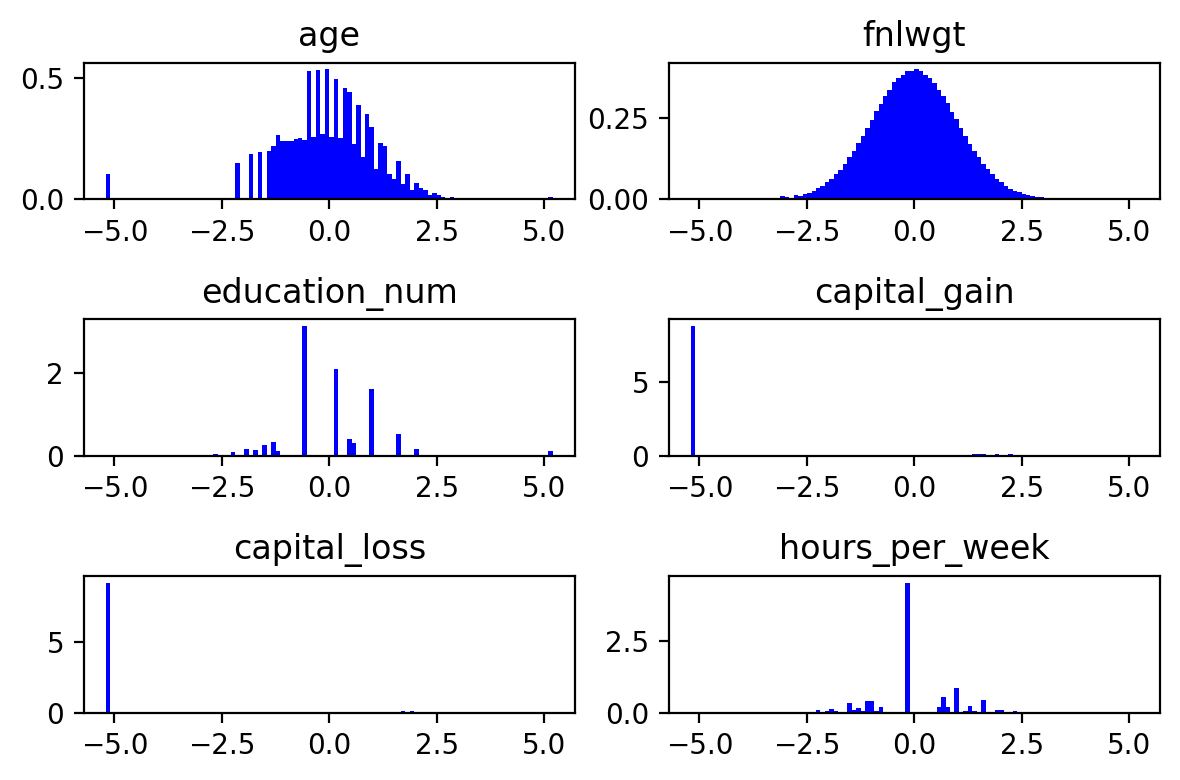

In [16]:
plot_distributions(X_train_quant)

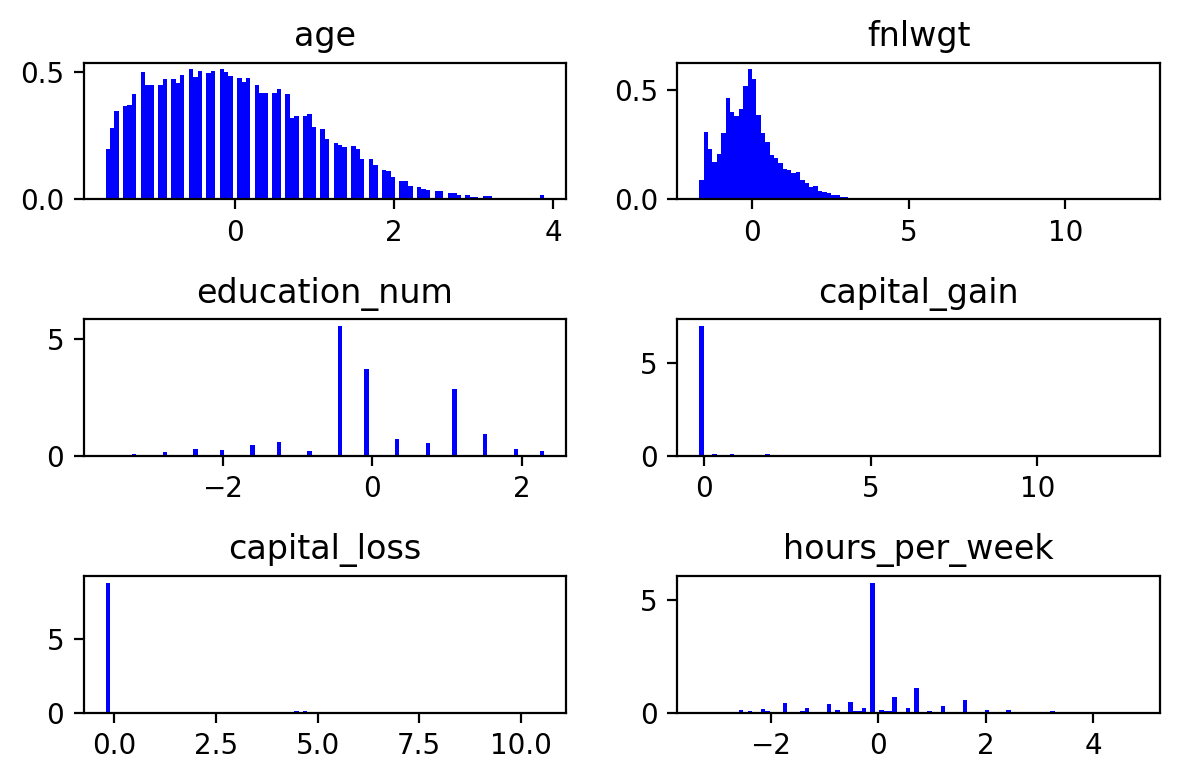

In [15]:
plot_distributions(X_train_stand)

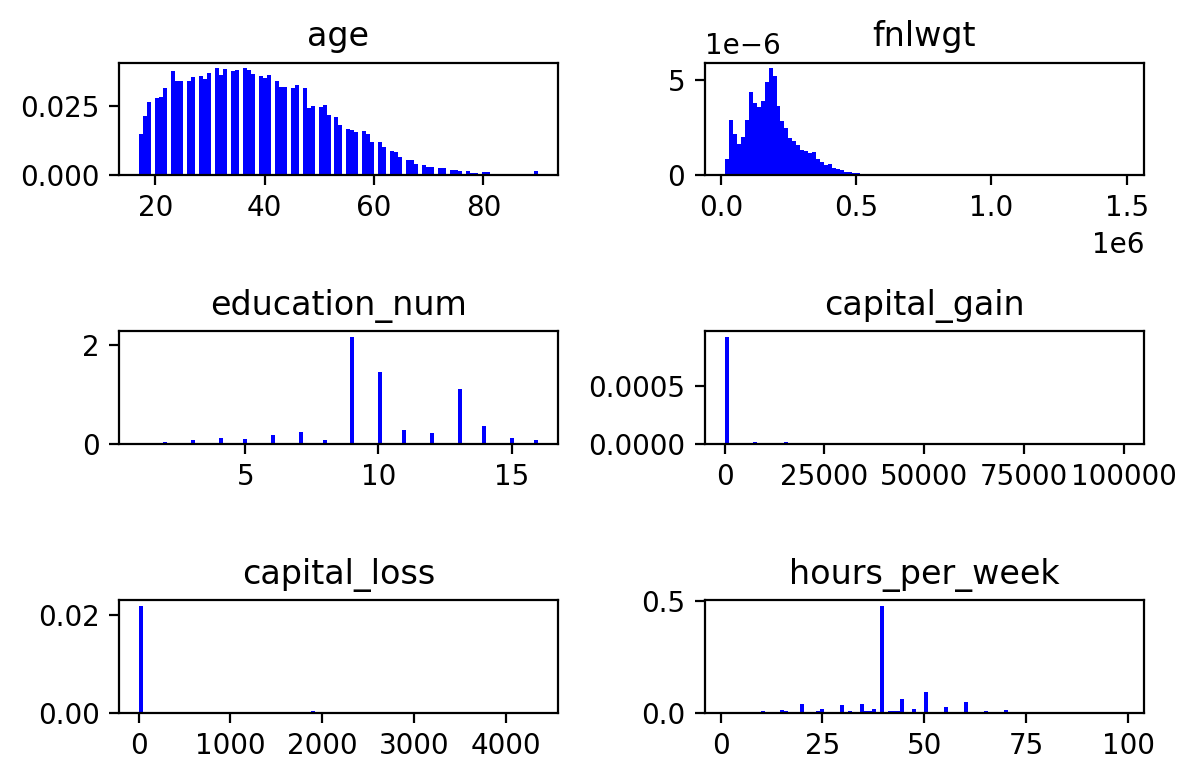

In [26]:
# Next we descale the data again to check if it as the original data.
X_train_og, y_train_og = Adult_quant.get_training_data()
OG_data = X_train_og[numerical_features]
plot_distributions(OG_data)

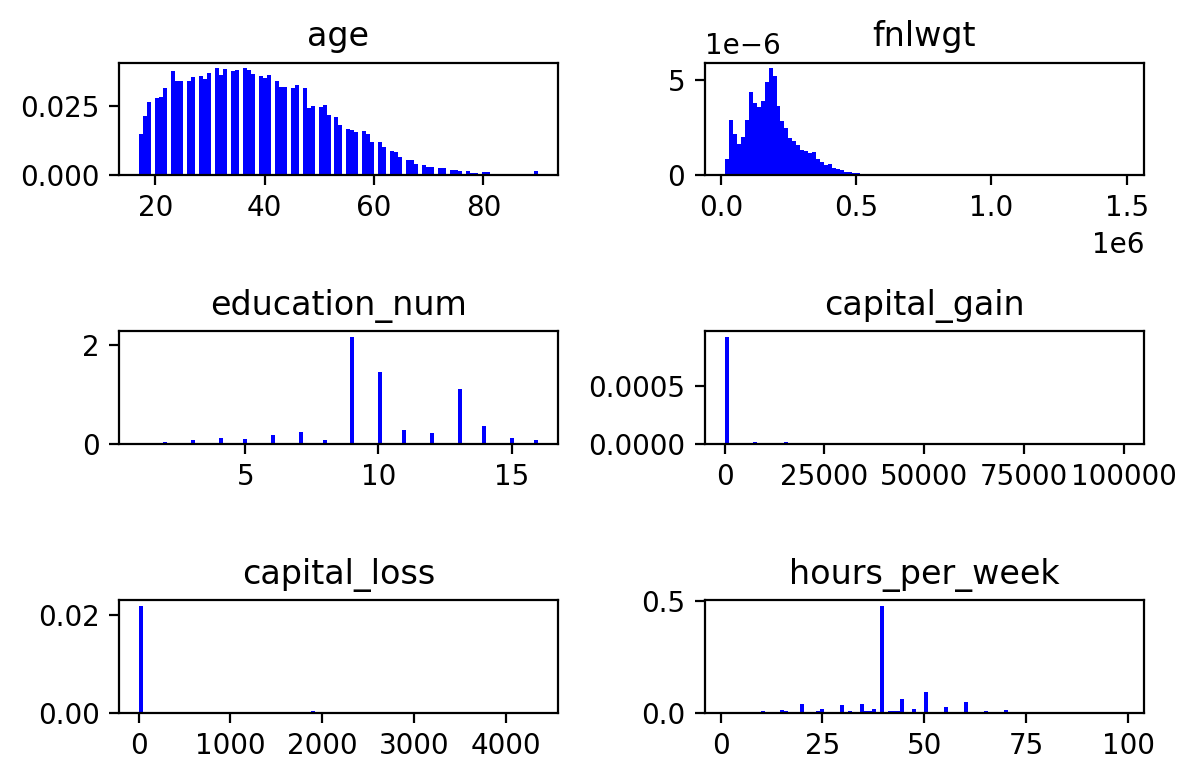

In [31]:
# Descale the Quantile transformed data.
OG_data_quant = Adult_quant.descale(X_train_quant)
plot_distributions(OG_data_quant)

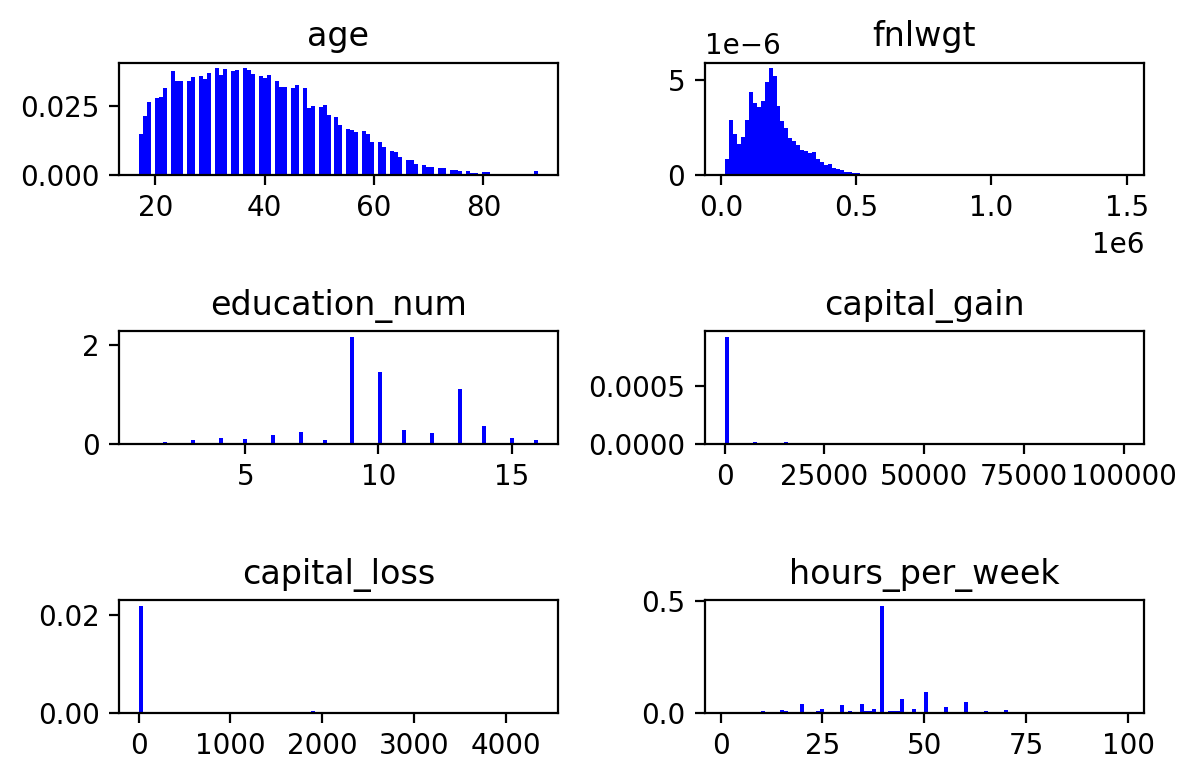

In [43]:
# Descale the standard transformed data.
OG_data_stand = Adult_stand.descale(X_train_stand)
plot_distributions(OG_data_stand)

In [47]:
print(all(round(OG_data_quant) == OG_data))
print(all(round(OG_data_stand) == OG_data))
print(all(OG_data_quant == OG_data_stand))

True
True
True


In [41]:
OG_data_quant.iloc[3, 1]

114366.00000000001

In [42]:
OG_data.iloc[3, 1]

114366

In [50]:
OG_data_stand.iloc[3,1]

114366.0

In [52]:
X_train_stand.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.075595,0.037199,0.075546,0.056214,0.099989
fnlwgt,-0.075595,1.000000,-0.045498,-0.005263,-0.005412,-0.020319
education_num,0.037199,-0.045498,1.000000,0.129023,0.081346,0.148020
capital_gain,0.075546,-0.005263,0.129023,1.000000,-0.031623,0.085823
capital_loss,0.056214,-0.005412,0.081346,-0.031623,1.000000,0.052100
hours_per_week,0.099989,-0.020319,0.148020,0.085823,0.052100,1.000000


In [59]:
np.allclose(OG_data_stand.corr().to_numpy(), X_train_stand.corr().to_numpy(), rtol = 1e-40)

True

In [60]:
X_train_quant.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.060631,0.114305,0.115074,0.054484,0.177742
fnlwgt,-0.060631,1.000000,-0.040190,-0.009997,-0.002661,-0.025343
education_num,0.114305,-0.040190,1.000000,0.129341,0.081187,0.157604
capital_gain,0.115074,-0.009997,0.129341,1.000000,-0.066208,0.087811
capital_loss,0.054484,-0.002661,0.081187,-0.066208,1.000000,0.054159
hours_per_week,0.177742,-0.025343,0.157604,0.087811,0.054159,1.000000


In [61]:
OG_data_quant.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.075595,0.037199,0.075546,0.056214,0.099989
fnlwgt,-0.075595,1.000000,-0.045498,-0.005263,-0.005412,-0.020319
education_num,0.037199,-0.045498,1.000000,0.129023,0.081346,0.148020
capital_gain,0.075546,-0.005263,0.129023,1.000000,-0.031623,0.085823
capital_loss,0.056214,-0.005412,0.081346,-0.031623,1.000000,0.052100
hours_per_week,0.099989,-0.020319,0.148020,0.085823,0.052100,1.000000


In [67]:
OG_data.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.075595,0.037199,0.075546,0.056214,0.099989
fnlwgt,-0.075595,1.000000,-0.045498,-0.005263,-0.005412,-0.020319
education_num,0.037199,-0.045498,1.000000,0.129023,0.081346,0.148020
capital_gain,0.075546,-0.005263,0.129023,1.000000,-0.031623,0.085823
capital_loss,0.056214,-0.005412,0.081346,-0.031623,1.000000,0.052100
hours_per_week,0.099989,-0.020319,0.148020,0.085823,0.052100,1.000000


In [66]:
np.allclose(OG_data.corr().to_numpy(), OG_data_quant.corr().to_numpy(), rtol = 1e-40)

True